<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_26_Transfer_Learning_Feature_Extraction/Lecture_26_Part_01_transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer_Learning_Feature_Extraction(Without_Data_Augmentation)**

In [1]:
!mkdir -p ~/.kaggle # Create a directory for Kaggle configuration
!cp kaggle.json ~/.kaggle/ # Copy the Kaggle API token to the configuration directory
!chmod 600 ~/.kaggle/kaggle.json # Set permissions for the Kaggle API token

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats # Download the dogs-vs-cats dataset from Kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.03G/1.06G [00:07<00:00, 45.6MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r') # Open the downloaded zip file
zip_ref.extractall('/content') # Extract the contents of the zip file
zip_ref.close() # Close the zip file

In [5]:
import tensorflow # Import the TensorFlow library
from tensorflow import keras # Import the Keras API from TensorFlow
from keras import Sequential # Import the Sequential model
from keras.layers import Dense,Flatten # Import Dense and Flatten layers
from keras.applications.vgg16 import VGG16 # Import the VGG16 pre-trained model

In [6]:
conv_base = VGG16(
    weights = 'imagenet', # Use weights pre-trained on ImageNet
    include_top = False, # Exclude the top classification layer
    input_shape = (150,150,3) # Define the input shape of the images
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
conv_base.summary() # Display the summary of the VGG16 convolutional base

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = Sequential() # Create a Sequential model

model.add(conv_base) # Add the VGG16 convolutional base to the model
model.add(Flatten()) # Add a Flatten layer to flatten the output of the convolutional base
model.add(Dense(256,activation = 'relu')) # Add a Dense layer with 256 units and ReLU activation
model.add(Dense(1,activation = 'sigmoid')) # Add a Dense output layer with 1 unit and Sigmoid activation for binary classification

In [9]:
model.summary() # Display the summary of the complete model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
conv_base.trainable = False # Freeze the convolutional base to prevent its weights from being updated during training

In [11]:
model.summary() # Display the summary of the model after freezing the convolutional base

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
# generator

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # Directory containing the training data
    labels = 'inferred', # Infer labels from directory names
    label_mode = 'int', # Labels are integers
    batch_size = 32, # Batch size for training
    image_size = (150,150) # Image size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', # Directory containing the validation data
    labels = 'inferred', # Infer labels from directory names
    label_mode = 'int', # Labels are integers
    batch_size = 32, # Batch size for validation
    image_size = (150,150) # Image size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize
def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32) # Normalize image pixel values to be between 0 and 1
  return image,label # Return the normalized image and its label

train_ds = train_ds.map(process) # Apply the normalization function to the training dataset
validation_ds = validation_ds.map(process) # Apply the normalization function to the validation dataset

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds) # Train the model for 10 epochs using the training and validation datasets

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 131ms/step - accuracy: 0.8418 - loss: 0.3879 - val_accuracy: 0.9132 - val_loss: 0.2070
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9199 - loss: 0.1971 - val_accuracy: 0.9186 - val_loss: 0.2020
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9315 - loss: 0.1695 - val_accuracy: 0.9152 - val_loss: 0.2116
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.9398 - loss: 0.1440 - val_accuracy: 0.9162 - val_loss: 0.2175
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - accuracy: 0.9544 - loss: 0.1154 - val_accuracy: 0.9148 - val_loss: 0.2371
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9643 - loss: 0.0882 - val_accuracy: 0.9110 - val_loss: 0.2595
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9752 - loss: 0.0638 - val_accuracy: 0.9118 - val_loss: 0.2689
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 132ms/step - accuracy: 0.9825 - loss: 

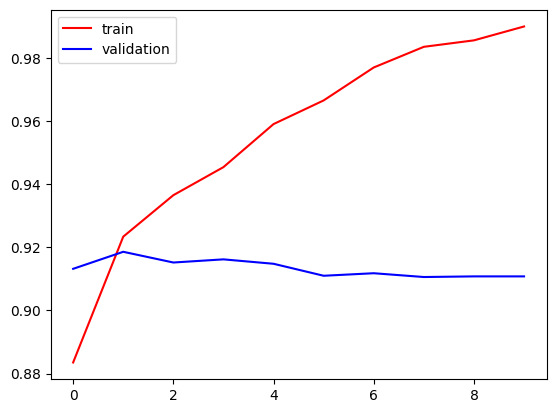

In [17]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting

plt.plot(history.history['accuracy'],color='red',label='train') # Plot training accuracy
plt.plot(history.history['val_accuracy'],color='blue',label='validation') # Plot validation accuracy
plt.legend() # Show the legend
plt.show() # Display the plot

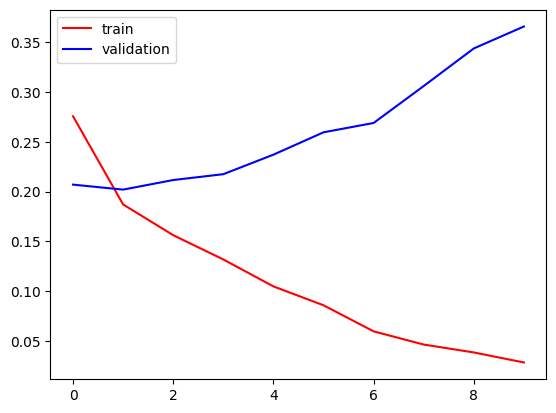

In [18]:
plt.plot(history.history['loss'],color='red',label='train') # Plot training loss
plt.plot(history.history['val_loss'],color='blue',label='validation') # Plot validation loss
plt.legend() # Show the legend
plt.show() # Display the plot